<a href="https://colab.research.google.com/github/AkshataMali/Result-Analysis-of-Students-/blob/main/Analysis_of_Student_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("/content/student.csv")

In [3]:
 print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,22076.000000,20949.000000,22075.000000,22075.000000,22075.000000
mean,494.885622,2.137811,66.602673,69.419298,68.471438
std,288.026078,1.473545,15.385894,14.758806,15.457044
min,0.000000,0.000000,0.000000,11.000000,6.000000
25%,246.000000,1.000000,56.000000,59.000000,58.000000
50%,490.000000,2.000000,67.000000,70.000000,69.000000
75%,744.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22076 entries, 0 to 22075
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           22076 non-null  int64  
 1   Gender               22076 non-null  object 
 2   EthnicGroup          20777 non-null  object 
 3   ParentEduc           20737 non-null  object 
 4   LunchType            22076 non-null  object 
 5   TestPrep             20757 non-null  object 
 6   ParentMaritalStatus  21215 non-null  object 
 7   PracticeSport        21615 non-null  object 
 8   IsFirstChild         21380 non-null  object 
 9   NrSiblings           20949 non-null  float64
 10  TransportMeans       19811 non-null  object 
 11  WklyStudyHours       21392 non-null  object 
 12  MathScore            22075 non-null  float64
 13  ReadingScore         22075 non-null  float64
 14  WritingScore         22075 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1299
ParentEduc,1339
LunchType,0
TestPrep,1319
ParentMaritalStatus,861
PracticeSport,461
IsFirstChild,696
NrSiblings,1127


In [7]:
df = df.drop("Unnamed: 0", axis =1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


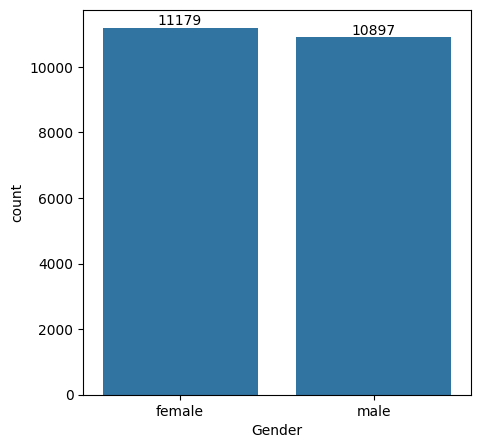

In [8]:
plt.figure(figsize=(5,5))
ax= sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.381731     71.189482     70.331656
bachelor's degree   70.560064     73.276014     73.505022
high school         64.434051     67.151448     65.341005
master's degree     72.454545     76.061953     76.651178
some college        66.349019     69.088204     68.428571
some high school    62.650699     65.609032     63.789920


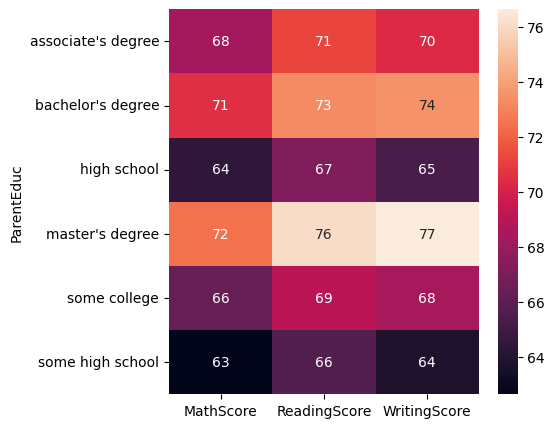

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot = True)
plt.show()

In [11]:
 gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.485385     69.502530     68.689432
married              66.759424     69.520741     68.565185
single               66.193771     69.089493     68.069781
widowed              68.113164     69.967667     68.953811


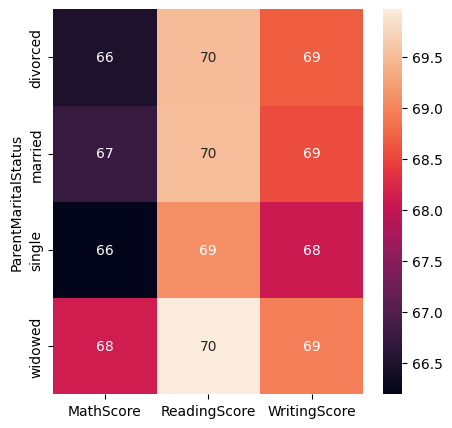

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1, annot = True)
plt.show()

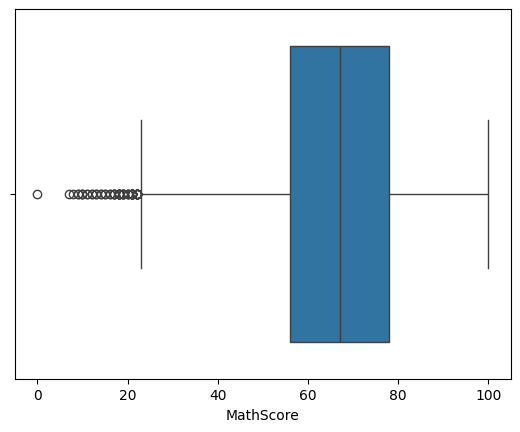

In [13]:
sns.boxplot(data =df, x="MathScore")
plt.show()

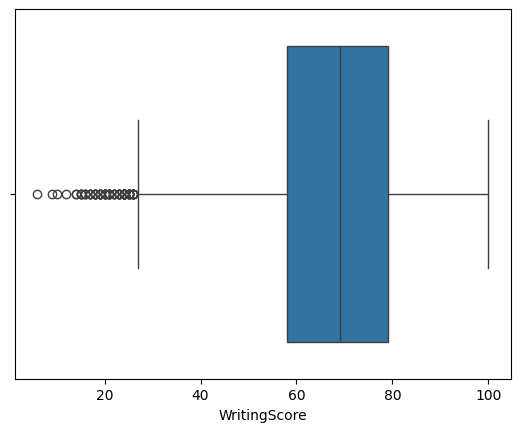

In [14]:
sns.boxplot(data =df, x="WritingScore")
plt.show()

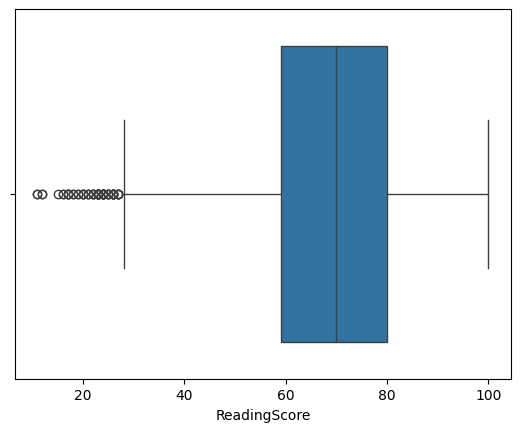

In [15]:
sns.boxplot(data =df, x="ReadingScore")
plt.show()

In [16]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [17]:
# Check the columns of the dataframe
print(df.columns)

# Drop the "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')


In [18]:
# Count the occurrences of each ethnic group
groupA_count = df.loc[df['EthnicGroup'] == "group A"].shape[0]
groupB_count = df.loc[df['EthnicGroup'] == "group B"].shape[0]
groupC_count = df.loc[df['EthnicGroup'] == "group C"].shape[0]
groupD_count = df.loc[df['EthnicGroup'] == "group D"].shape[0]
groupE_count = df.loc[df['EthnicGroup'] == "group E"].shape[0]

In [19]:
# List of group names
l = ["group A", "group B", "group C", "group D", "group E"]

# List of EthnicGroup counts
mlist = [groupA_count, groupB_count, groupC_count, groupD_count, groupE_count]

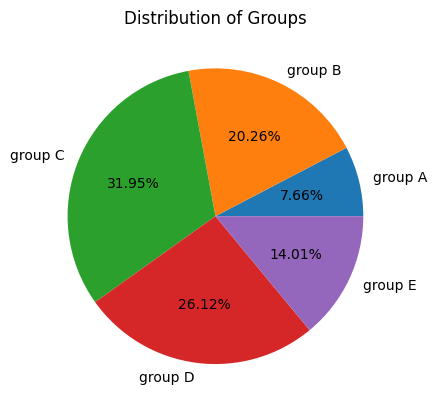

In [20]:
# Plot pie chart
plt.pie(mlist, labels=l, autopct="%1.2f%%")
plt.title("Distribution of Groups")
plt.show()